In [1]:
import os
from pathlib import Path
import pandas as pd

import sys
from pathlib import Path
sys.path.insert(0,str(Path(os.path.abspath('.')).parent.parent))
import library.validation.accuracy.metric as metric
import library.validation.accuracy.plotting_validation_results as plotting

In [2]:
ticket_path = Path.home()/"OneDrive-3E/Research/Solar/tickets/2024/IN3043_accuracy_factors_analysis"
data_path = Path.home()/"OneDrive-3E/Research/Solar/tickets/2024/IN3043_accuracy_factors_analysis/IN3136_EURAC_shared_folder/data_sites"
results_path = Path.home()/"OneDrive-3E/Research/Solar/tickets/2024/IN3043_accuracy_factors_analysis/IN3136_EURAC_shared_folder/validation_removed"
plots_path = Path.home()/"OneDrive-3E/Research/Solar/tickets/2024/IN3043_accuracy_factors_analysis/IN3136_EURAC_shared_folder/plots_removed"

# Read data

## read sites metadata

In [3]:
sites_metadata = pd.read_csv(os.path.join(data_path, "sites_metadata.csv"), index_col=0)
sites_metadata

,country,latitude,longitude,altitude,provider
station_name,,,,,
camborne,United Kingdom,50.22,-5.32,88.0,bsrn
carpentras,France,44.08,5.06,100.0,bsrn
budapest_lorinc,Hungary,47.43,19.18,139.0,bsrn
magurele_mars,Romania,44.34,26.01,110.0,bsrn
cabauw,Netherlands,51.97,4.93,0.0,bsrn
...,...,...,...,...,...
dublin_arpt,Ireland,53.43,-6.23,82.0,wrdc
grossenzersdorf,Austria,48.20,16.57,157.0,wrdc
gonzaga,Italy,44.96,10.77,16.0,lombardy


## read complexity

In [4]:
complexity = pd.read_csv(os.path.join(ticket_path, "complexity.csv"), index_col=0)
complexity

,country,latitude,longitude,altitude,provider,terrain_classification,tri_1km,tri_5km,tri_10km,tpi_1km,tpi_5km,tpi_10km,distance_to_coastline_km,climate_zone,clearness (%),climate_classification
station_name,,,,,,,,,,,,,,,,
camborne,United Kingdom,50.22,-5.32,88.0,bsrn,_flat plains,1.6250,2.875,2.875,0.2500,0.125,0.0,3.211302,Cfb,68.509617,C
carpentras,France,44.08,5.06,100.0,bsrn,_flat plains,1.5000,2.000,1.375,0.0000,0.000,0.0,57.987479,Cfb,84.703463,C
budapest_lorinc,Hungary,47.43,19.18,139.0,bsrn,_flat plains,2.1250,1.375,1.500,0.1875,0.000,0.0,482.028360,Cfb,73.573263,C
magurele_mars,Romania,44.34,26.01,110.0,bsrn,_flat plains,0.8125,0.750,0.875,0.0000,0.000,0.0,198.059538,Cfa,76.351207,C
cabauw,Netherlands,51.97,4.93,0.0,bsrn,_flat plains,0.7500,0.500,0.500,0.0625,0.000,0.0,49.955084,Cfb,70.044037,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dublin_arpt,Ireland,53.43,-6.23,82.0,wrdc,_flat plains,1.5000,1.250,1.125,-0.1250,0.125,0.0,4.175609,Cfb,64.296802,C
grossenzersdorf,Austria,48.20,16.57,157.0,wrdc,_flat plains,1.0000,1.125,1.125,0.0625,0.000,0.0,357.351298,Cfb,71.090746,C
gonzaga,Italy,44.96,10.77,16.0,lombardy,_flat plains,0.8750,1.125,1.000,0.0000,0.000,0.0,117.377329,Cfa,78.808519,C


## read validation results

In [5]:
validation = pd.read_csv(os.path.join(results_path, "validation_results_sites.csv"), index_col=0)
validation.index.name = 'station_name'

validation

,nmbe,nrmse_yearly,nrmse_monthly,nrmse_daily,valid_data_pairs_daily
station_name,,,,,
camborne,-1.56,2.25,2.87,9.90,941
carpentras,-0.46,0.79,2.25,6.23,1459
budapest_lorinc,-0.21,0.37,2.50,6.64,935
magurele_mars,-0.12,0.12,2.78,6.35,244
cabauw,0.06,0.63,2.18,7.64,2547
...,...,...,...,...,...
zuerich_kloten,0.77,1.00,2.68,7.44,2192
basel,2.36,2.63,3.72,7.86,2192
gurteen,2.35,2.52,4.56,10.82,2192


In [6]:
merged_df = pd.merge(complexity, validation, on='station_name')
merged_df

,country,latitude,longitude,altitude,provider,terrain_classification,tri_1km,tri_5km,tri_10km,tpi_1km,...,tpi_10km,distance_to_coastline_km,climate_zone,clearness (%),climate_classification,nmbe,nrmse_yearly,nrmse_monthly,nrmse_daily,valid_data_pairs_daily
station_name,,,,,,,,,,,,,,,,,,,,,
camborne,United Kingdom,50.22,-5.32,88.0,bsrn,_flat plains,1.6250,2.875,2.875,0.2500,...,0.0,3.211302,Cfb,68.509617,C,-1.56,2.25,2.87,9.90,941
carpentras,France,44.08,5.06,100.0,bsrn,_flat plains,1.5000,2.000,1.375,0.0000,...,0.0,57.987479,Cfb,84.703463,C,-0.46,0.79,2.25,6.23,1459
budapest_lorinc,Hungary,47.43,19.18,139.0,bsrn,_flat plains,2.1250,1.375,1.500,0.1875,...,0.0,482.028360,Cfb,73.573263,C,-0.21,0.37,2.50,6.64,935
magurele_mars,Romania,44.34,26.01,110.0,bsrn,_flat plains,0.8125,0.750,0.875,0.0000,...,0.0,198.059538,Cfa,76.351207,C,-0.12,0.12,2.78,6.35,244
cabauw,Netherlands,51.97,4.93,0.0,bsrn,_flat plains,0.7500,0.500,0.500,0.0625,...,0.0,49.955084,Cfb,70.044037,C,0.06,0.63,2.18,7.64,2547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dublin_arpt,Ireland,53.43,-6.23,82.0,wrdc,_flat plains,1.5000,1.250,1.125,-0.1250,...,0.0,4.175609,Cfb,64.296802,C,3.36,3.49,5.24,9.97,2187
grossenzersdorf,Austria,48.20,16.57,157.0,wrdc,_flat plains,1.0000,1.125,1.125,0.0625,...,0.0,357.351298,Cfb,71.090746,C,5.93,6.07,6.86,9.84,2192
gonzaga,Italy,44.96,10.77,16.0,lombardy,_flat plains,0.8750,1.125,1.000,0.0000,...,0.0,117.377329,Cfa,78.808519,C,-6.26,6.30,7.57,11.08,2557


## based on daily data

### read data

In [7]:
reference_data_daily = pd.read_csv(os.path.join(data_path, "parsed", "parsed_reference_data_daily.csv"), index_col=0)
model_data_daily = pd.read_csv(os.path.join(data_path, "parsed", "parsed_model_data_daily.csv"), index_col=0)

In [8]:
# convert index in pd.DateTimeIndex
reference_data_daily.index = pd.DatetimeIndex(reference_data_daily.index)
model_data_daily.index = pd.DatetimeIndex(model_data_daily.index)

### parse

In [9]:
# convert to nan where the other dataset is nan
reference_data_daily = reference_data_daily.where(model_data_daily.notna())
model_data_daily = model_data_daily.where(reference_data_daily.notna())

In [10]:
# aggregate
reference_data_monthly = reference_data_daily.resample('MS').sum(min_count=1)
model_data_monthly = model_data_daily.resample('MS').sum(min_count=1)
reference_data_yearly = reference_data_daily.resample('AS').sum(min_count=1)
model_data_yearly = model_data_daily.resample('AS').sum(min_count=1)

In [11]:
reference_data_yearly

,aberporth,dunstaffnage,belfast_aldergrove_arpt,edinburgh,wattisham,odiham,aberdeen_dyce_arpt,waddington,almeria_arpt,santiago_arpt,...,melun,tarbes_ossun,aubenas,bergerac,blois,zuerich_kloten,basel,gurteen,dublin_arpt,grossenzersdorf
2015-01-01 00:00:00+00:00,1115105.555,848652.778,964880.563,922316.670,1072611.112,1080844.439,915972.226,1039158.332,1886897.229,1350249.998,...,1222958.324,1338238.888,1525652.78,1364613.889,1259161.118,1296863.881,1279355.550,982416.662,1014322.226,1178100.007
2016-01-01 00:00:00+00:00,1033819.446,854897.231,926322.229,863399.997,1081272.221,1079141.657,890355.565,1022883.336,1893619.445,1373438.888,...,1102597.221,1333533.327,NaN,1325505.554,1166066.667,1192124.998,1168577.770,938988.884,974766.666,1182916.667
2017-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1879038.895,1281130.547,...,1180988.889,1388377.779,NaN,1340438.888,1230061.114,1287483.337,1286480.565,928019.450,943002.774,1198013.891
2018-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1839244.453,1290372.220,...,1245316.661,1288372.225,NaN,1359177.769,1278758.331,1305788.888,1296758.337,990391.662,991866.664,1229005.549
2019-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1926916.669,1309044.443,...,1249791.665,1388819.440,NaN,1377719.443,1303347.216,1287986.109,1309047.229,973919.449,956677.775,1238497.222
2020-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1921213.891,1169300.000,...,1295013.900,1312224.999,NaN,1388511.111,1296388.898,1320749.998,1336669.443,957155.544,997083.337,1240800.002


## based on hourly data

### read data

In [12]:
reference_data_hourly = pd.read_csv(os.path.join(data_path, "parsed", "parsed_reference_data_hourly.csv"), index_col=0)
model_data_hourly = pd.read_csv(os.path.join(data_path, "parsed", "parsed_model_data_hourly.csv"), index_col=0)

In [13]:
# convert index in pd.DateTimeIndex
reference_data_hourly.index = pd.DatetimeIndex(reference_data_hourly.index)
model_data_hourly.index = pd.DatetimeIndex(model_data_hourly.index)

### parse

In [14]:
# convert to nan where the other dataset is nan
reference_data_hourly = reference_data_hourly.where(model_data_hourly.notna())
model_data_hourly = model_data_hourly.where(reference_data_hourly.notna())

# Plot

## Time

### Hourly -> Hour

#### nMBE by hour (mean for each site and each hour)

In [32]:
nmbe_mean_by_hour, average_nmbe_mean_by_hour = plotting.ave_nmbe_hour(reference_data_hourly, model_data_hourly)

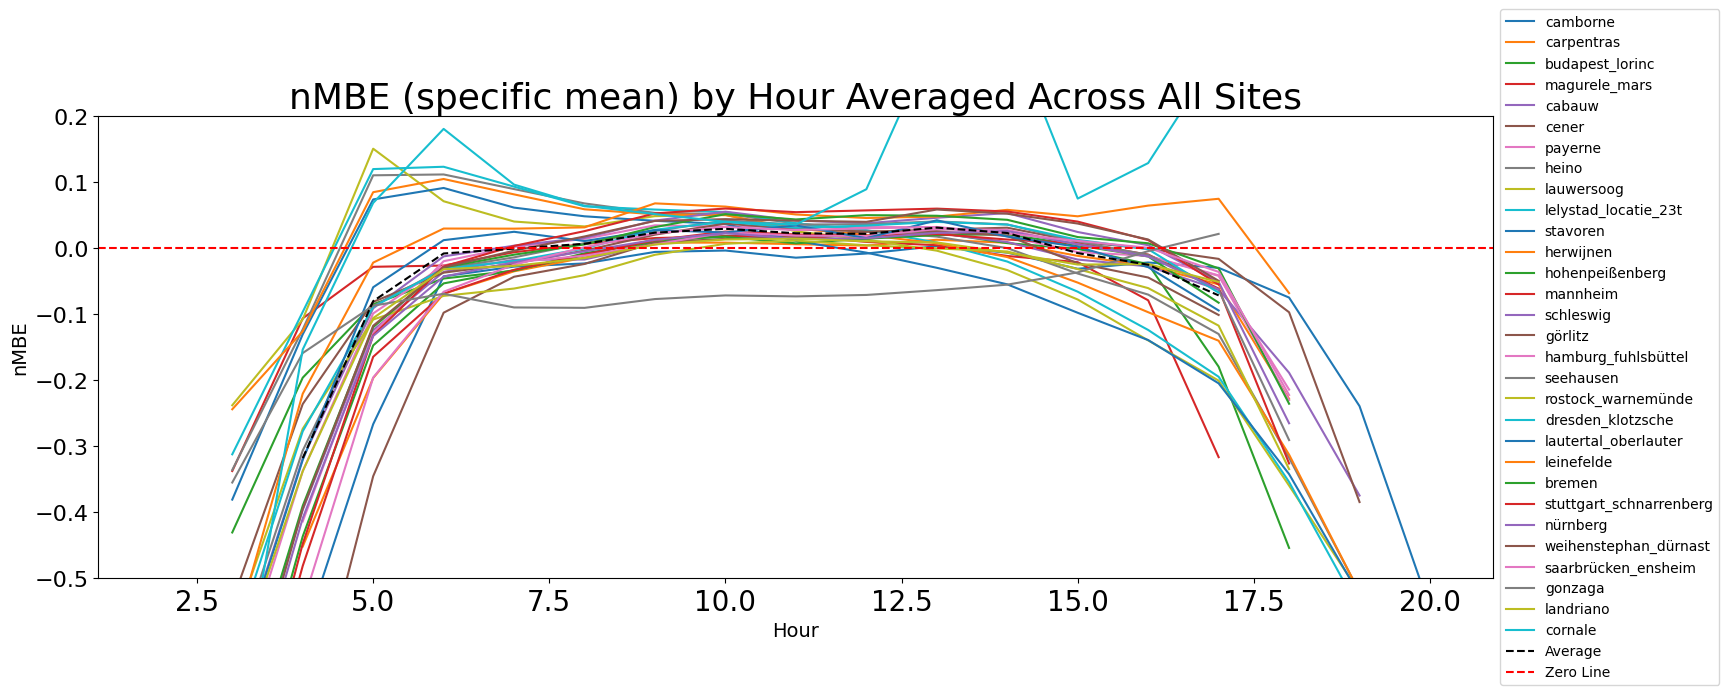

In [33]:
plotting.time_line_plot(nmbe_mean_by_hour, average_nmbe_mean_by_hour, 'nMBE', 'Hour', plots_path, lim=(-0.5,0.2))

#### nMBE by hour (mean for each site)

In [34]:
nmbe_tot_mean_by_hour, average_nmbe_tot_mean_by_hour = plotting.ave_nmbe_hour(reference_data_hourly, model_data_hourly, total=True)

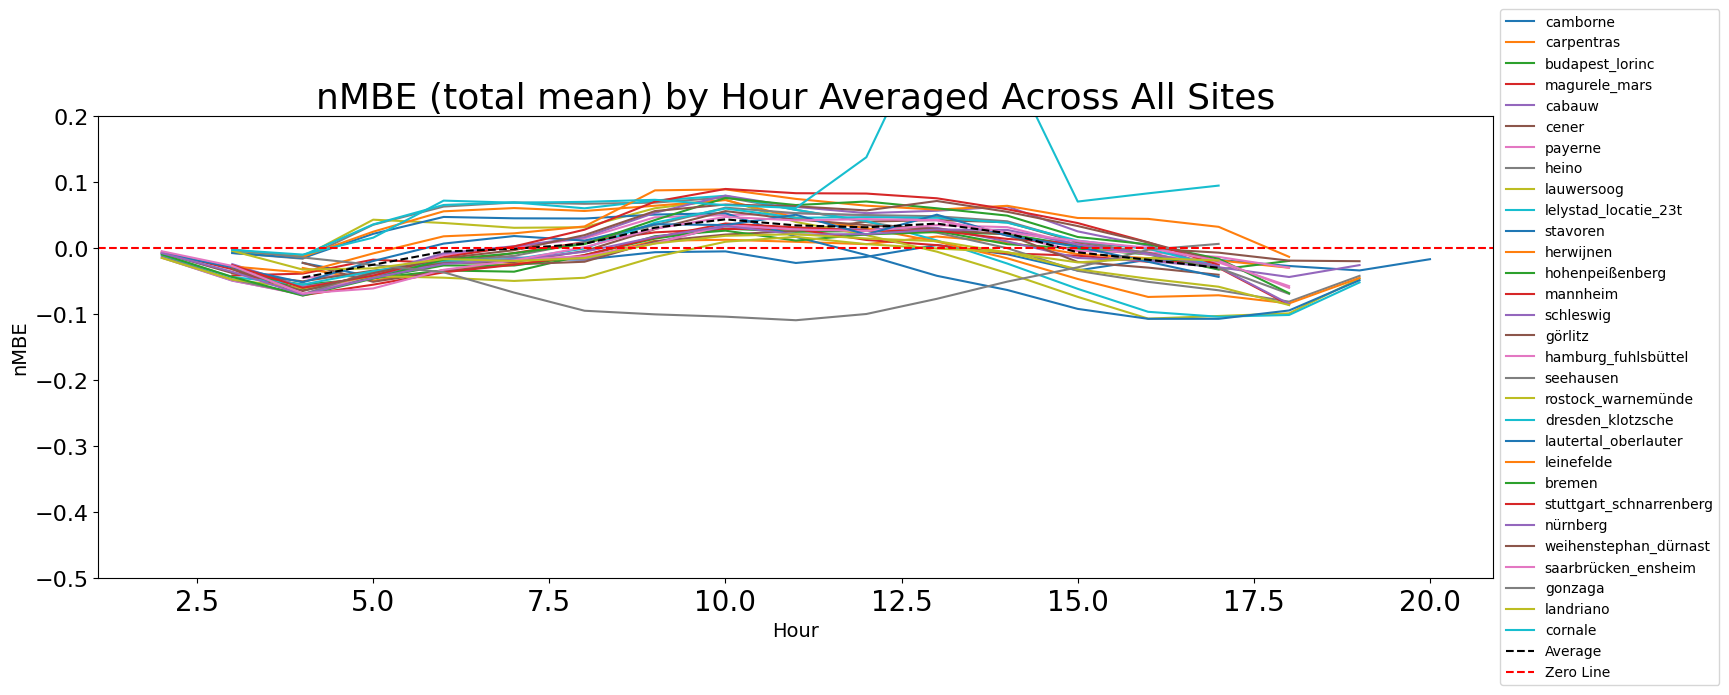

In [35]:
plotting.time_line_plot(nmbe_tot_mean_by_hour, average_nmbe_tot_mean_by_hour, 'nMBE', 'Hour', plots_path, lim=(-0.5,0.2), total=True)

#### nRMSE by hour (mean for each site and each hour)

In [36]:
nrmse_mean_by_hour, average_nrmse_mean_by_hour = plotting.ave_nrmse_hour(reference_data_hourly, model_data_hourly)

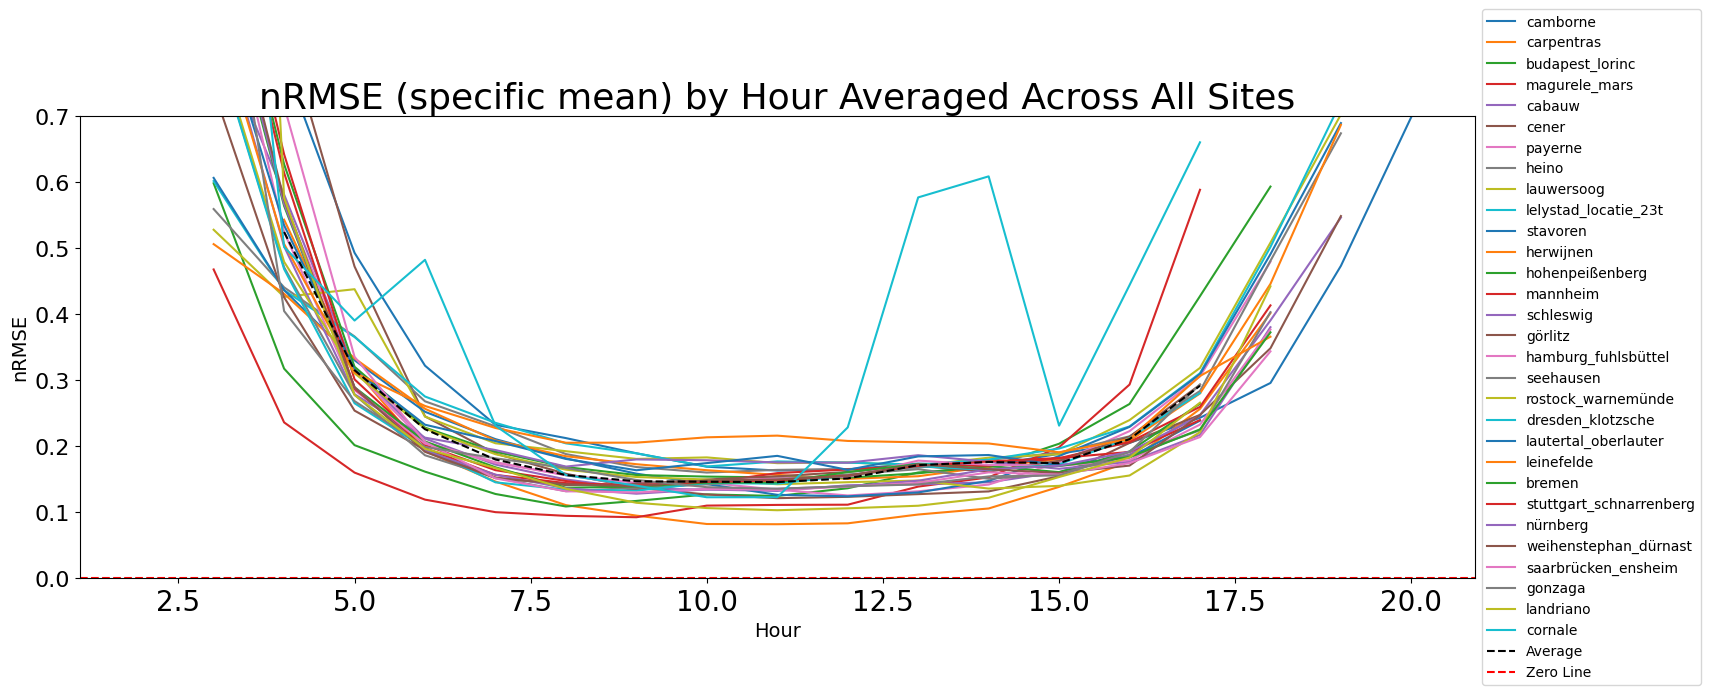

In [37]:
plotting.time_line_plot(nrmse_mean_by_hour, average_nrmse_mean_by_hour, 'nRMSE', 'Hour', plots_path, lim=(0,0.7))

#### nRMSE by hour (mean for each site)

In [38]:
nrmse_tot_mean_by_hour, average_nrmse_tot_mean_by_hour = plotting.ave_nrmse_hour(reference_data_hourly, model_data_hourly, total=True)

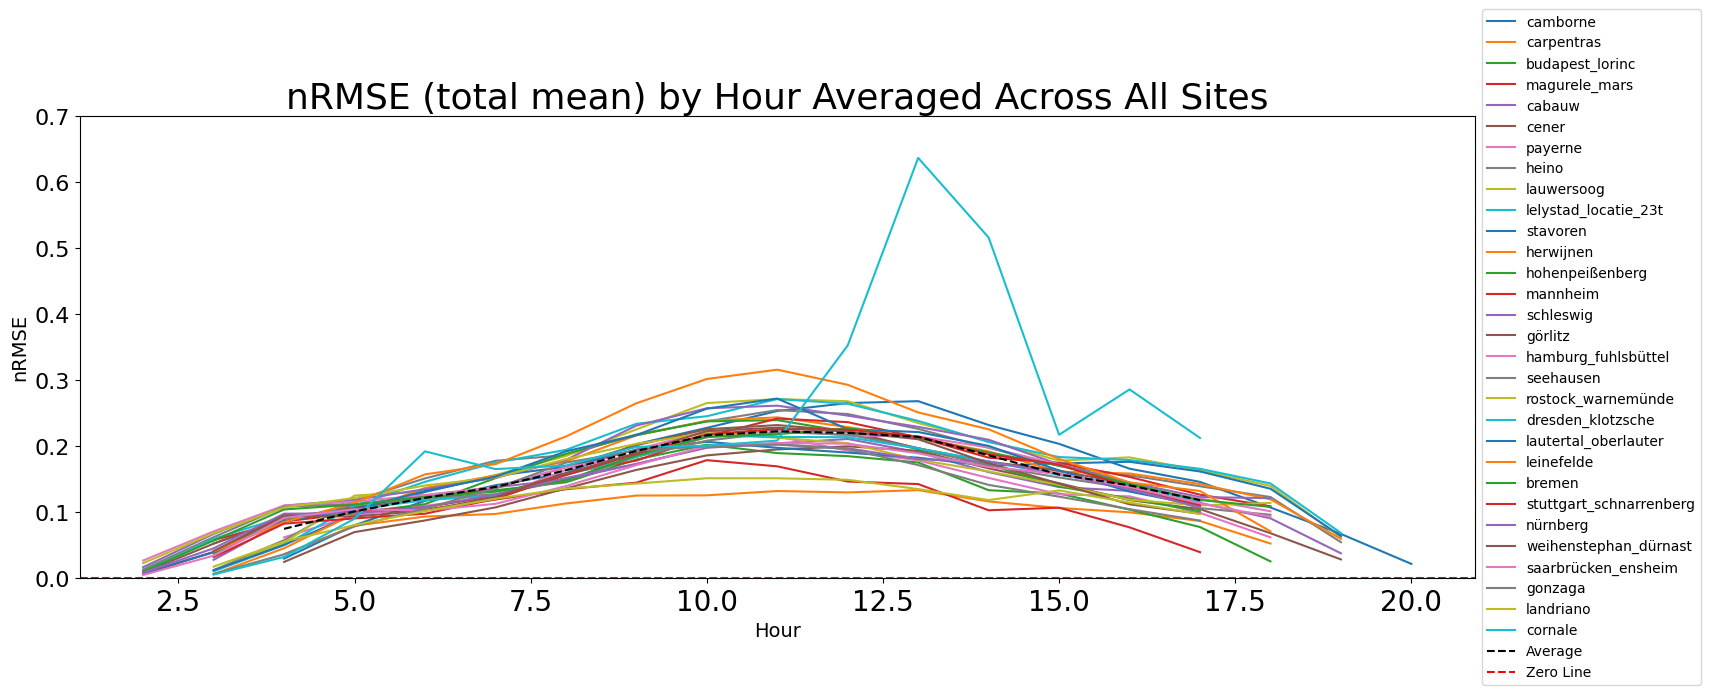

In [39]:
plotting.time_line_plot(nrmse_tot_mean_by_hour, average_nrmse_tot_mean_by_hour, 'nRMSE', 'Hour', plots_path, lim=(0,0.7), total=True)

### Daily -> Month

#### nMBE by month (mean for each site and each hour)

In [15]:
nmbe_mean_by_month, average_nmbe_mean_by_month = plotting.ave_nmbe_month(reference_data_monthly, model_data_monthly)

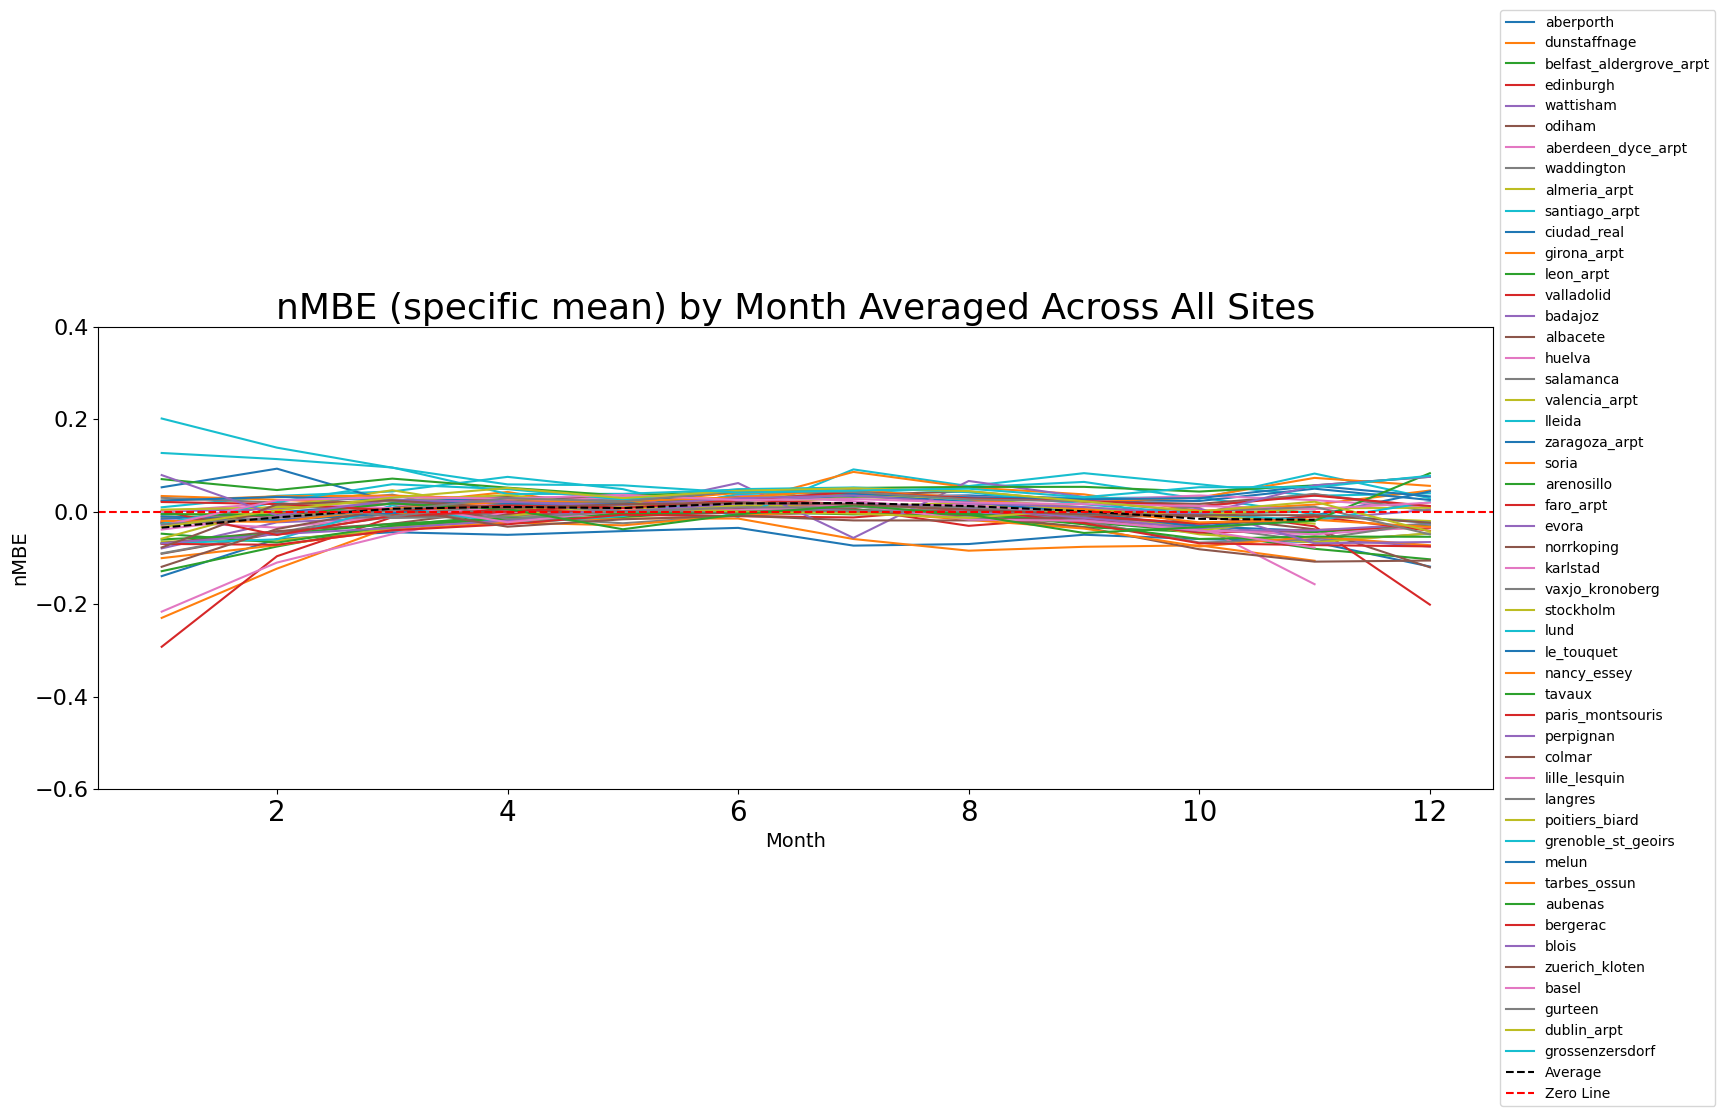

In [41]:
plotting.time_line_plot(nmbe_mean_by_month, average_nmbe_mean_by_month, 'nMBE', 'Month', plots_path, lim=(-0.6,0.4))

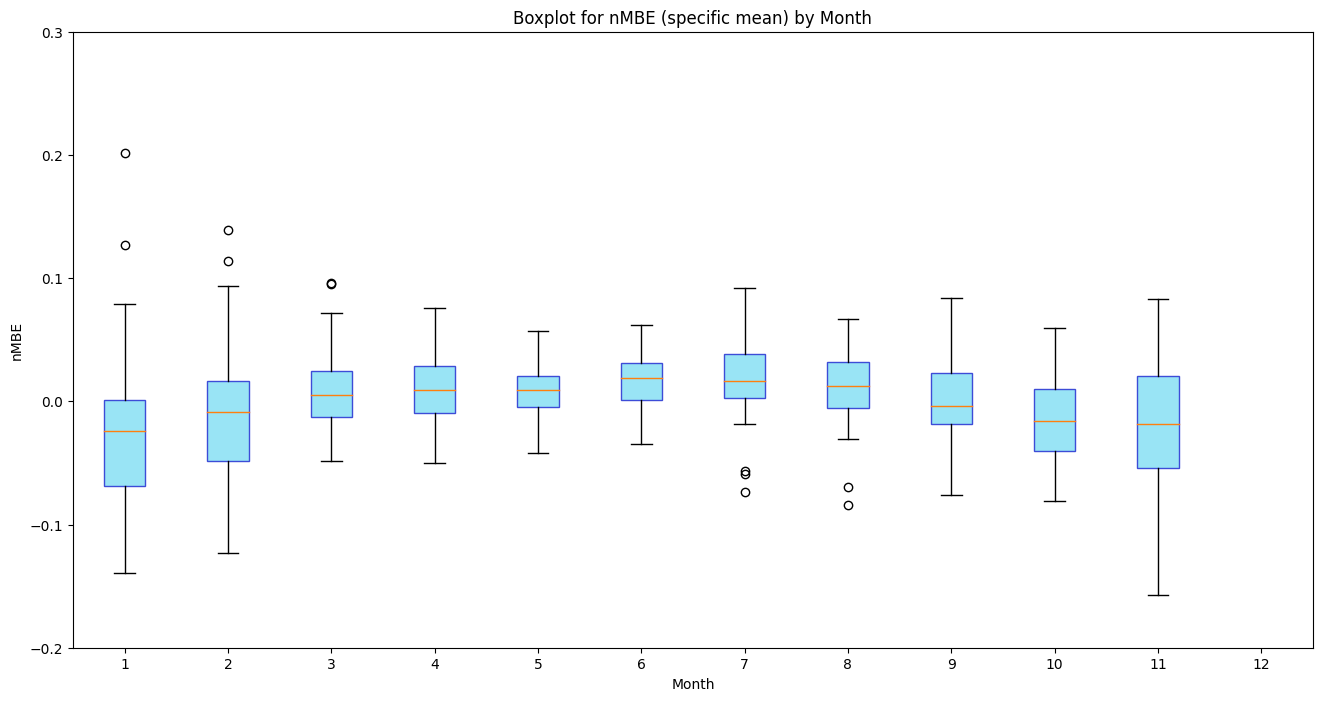

In [16]:
plotting.time_box_plot(nmbe_mean_by_month, 'nMBE', 'Month', plots_path, lim=(-0.2, 0.3))

#### nMBE by month (mean for each site)

In [43]:
nmbe_tot_mean_by_month, average_nmbe_tot_mean_by_month = plotting.ave_nmbe_month(reference_data_monthly, model_data_monthly, total=True)

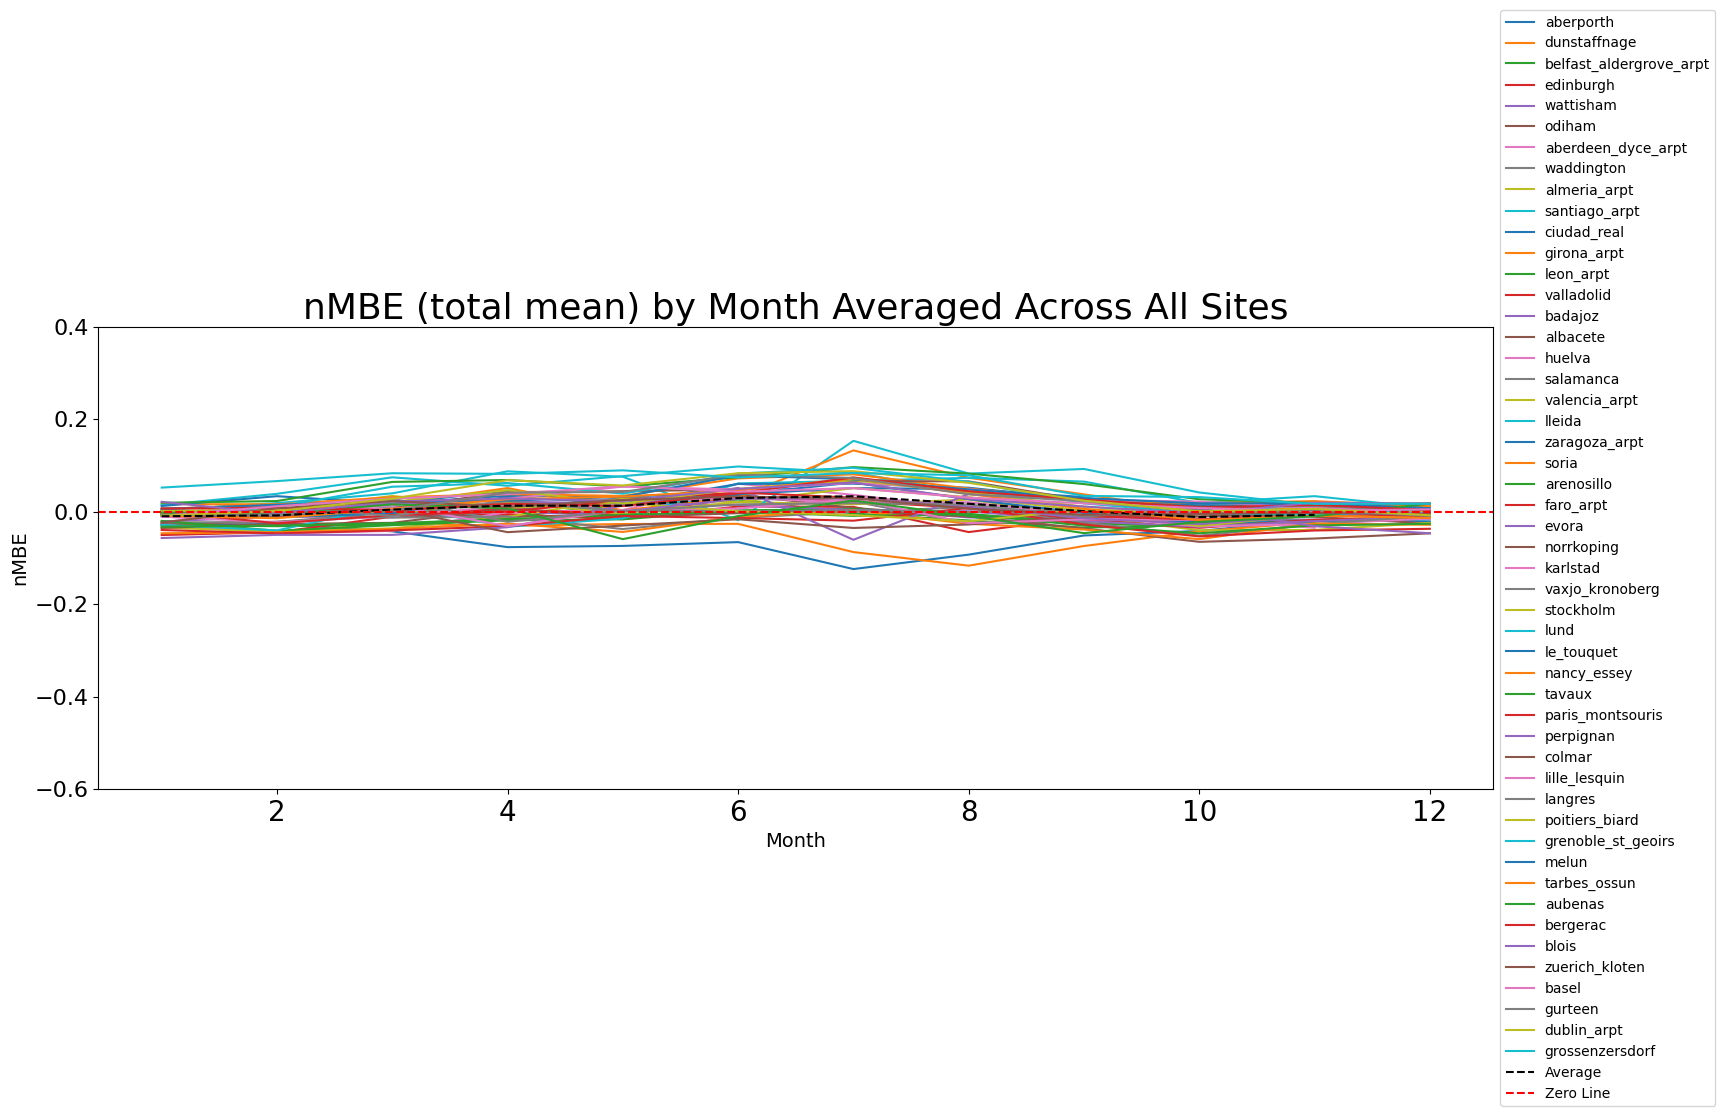

In [44]:
plotting.time_line_plot(nmbe_tot_mean_by_month, average_nmbe_tot_mean_by_month, 'nMBE', 'Month', plots_path, lim=(-0.6,0.4), total=True)

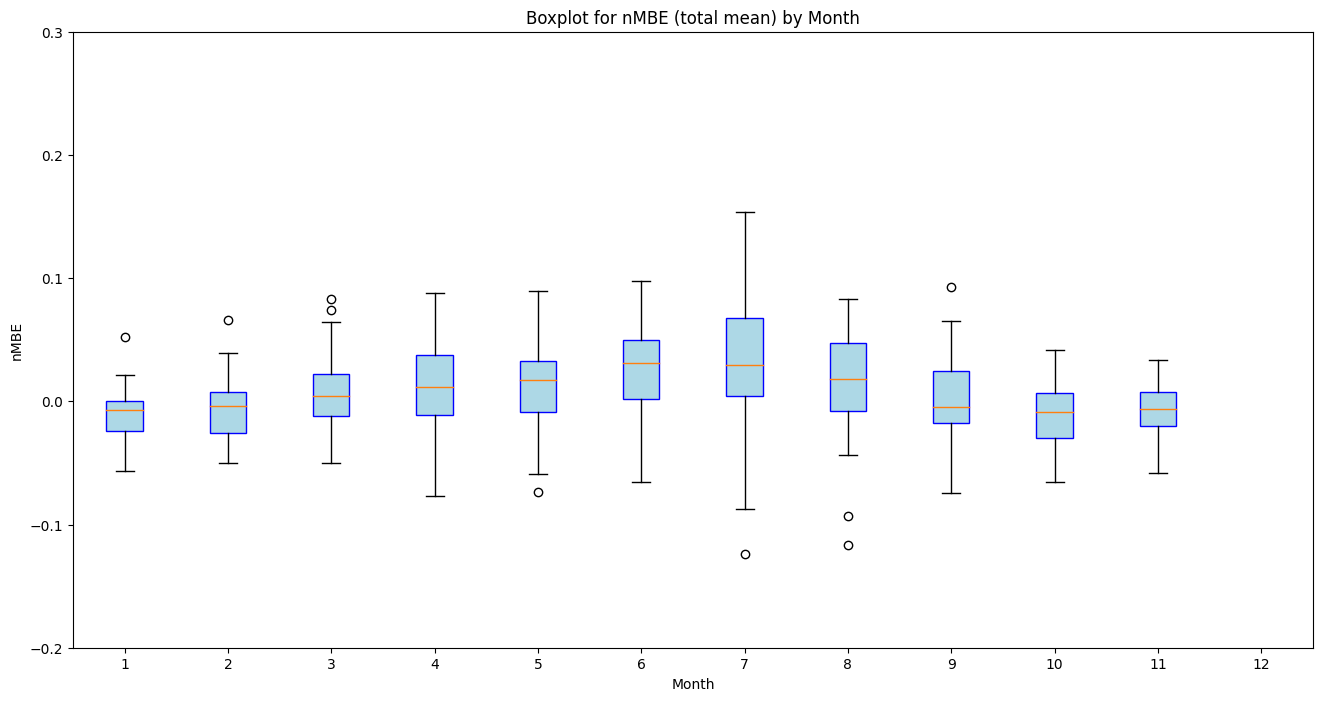

In [55]:
plotting.time_box_plot(nmbe_tot_mean_by_month, 'nMBE', 'Month', plots_path, lim=(-0.2, 0.3), total=True)

#### nRMSE by month (mean for each site and each hour)

In [28]:
nrmse_mean_by_month, average_nrmse_mean_by_month = plotting.ave_nrmse_month(reference_data_monthly, model_data_monthly)

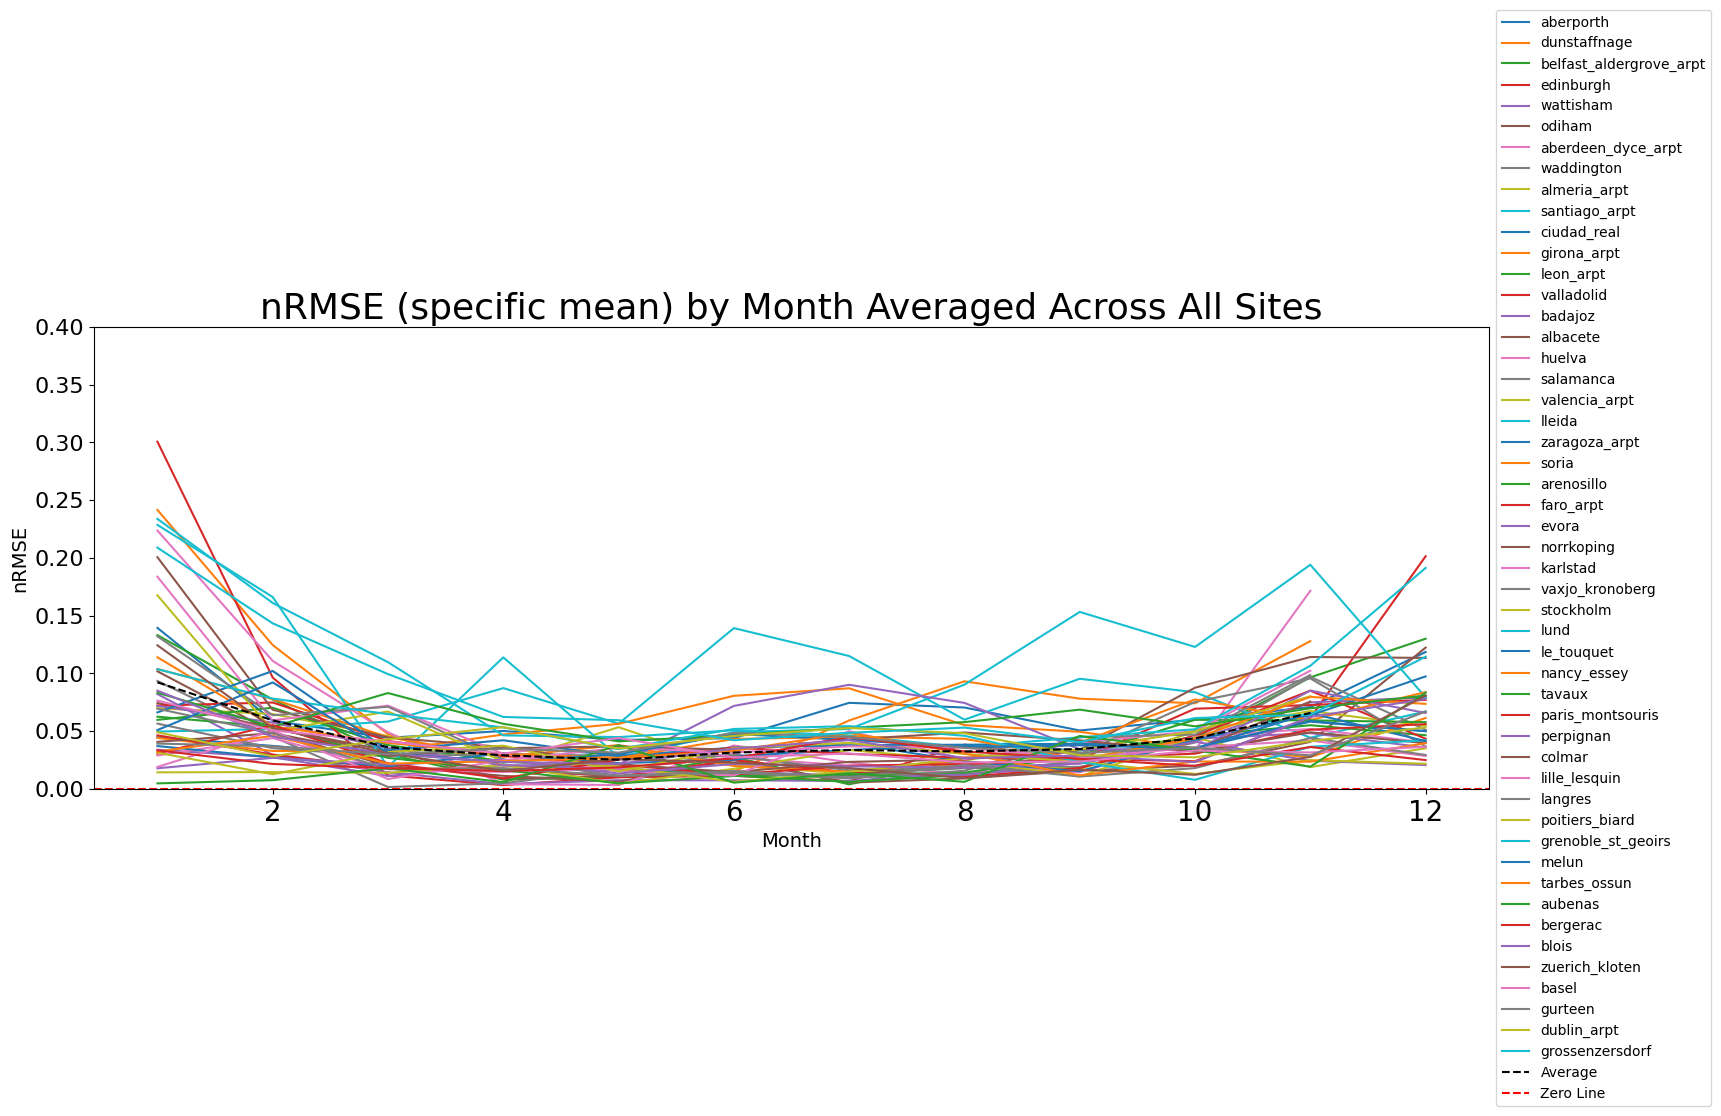

In [57]:
plotting.time_line_plot(nrmse_mean_by_month, average_nrmse_mean_by_month, 'nRMSE', 'Month', plots_path, lim=(0,0.4))

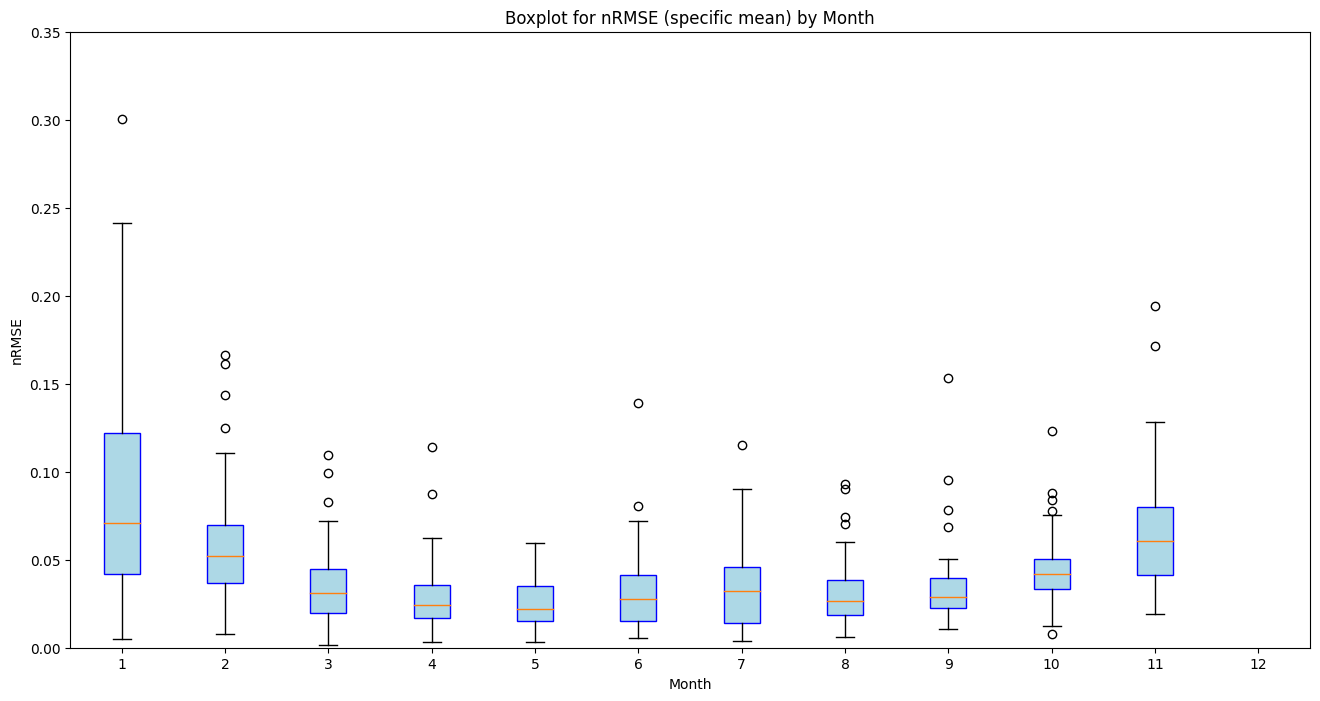

In [59]:
plotting.time_box_plot(nrmse_mean_by_month, 'nRMSE', 'Month', plots_path, lim=(0, 0.35))

#### nMBE by month (mean for each site)

In [49]:
nrmse_tot_mean_by_month, average_nrmse_tot_mean_by_month = plotting.ave_nrmse_month(reference_data_monthly, model_data_monthly, total=True)

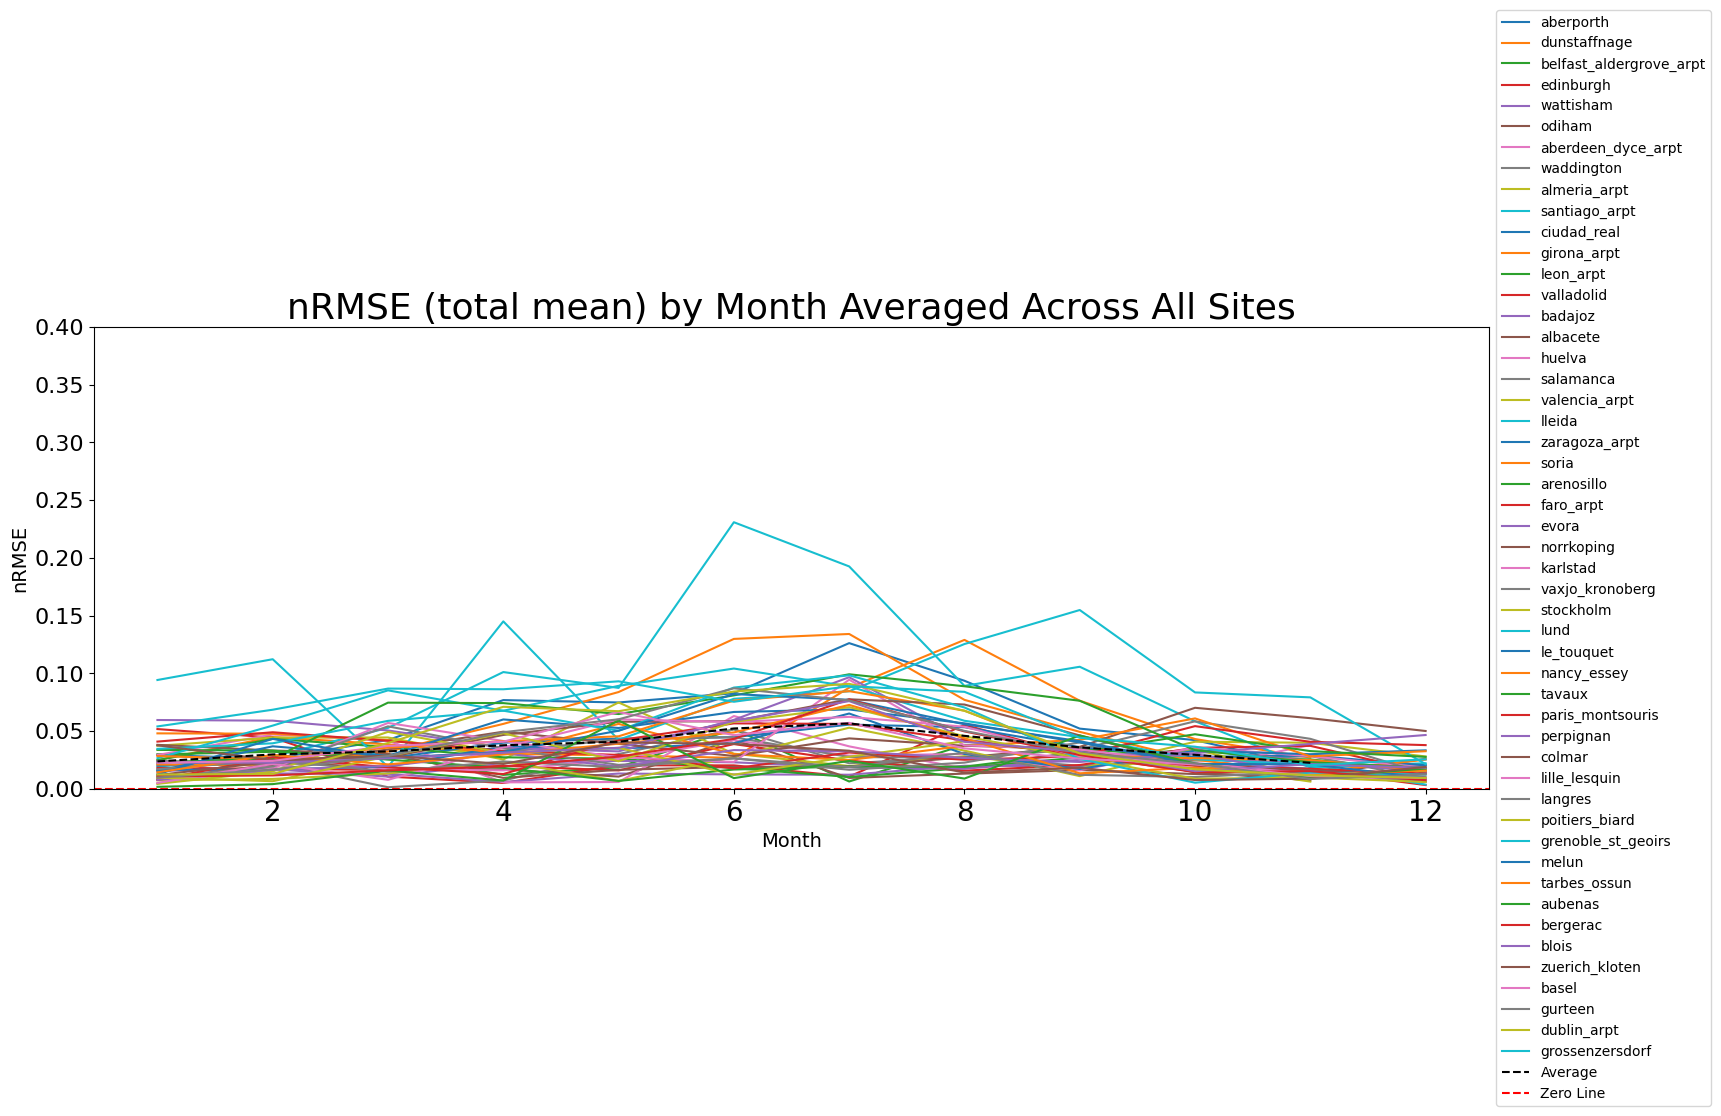

In [56]:
plotting.time_line_plot(nrmse_tot_mean_by_month, average_nrmse_tot_mean_by_month, 'nRMSE', 'Month', plots_path, lim=(0,0.4), total=True)

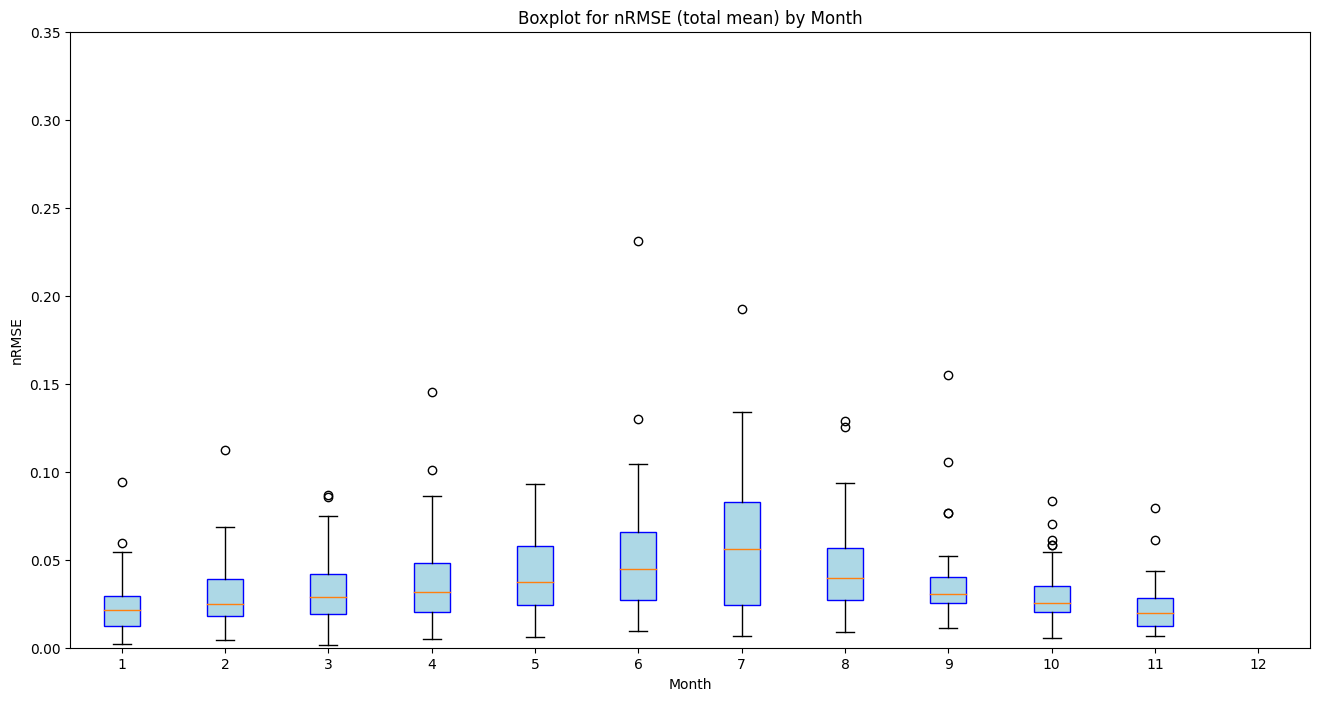

In [60]:
plotting.time_box_plot(nrmse_tot_mean_by_month, 'nRMSE', 'Month', plots_path, lim=(0, 0.35), total=True)

## Categorical (climate)

### groups

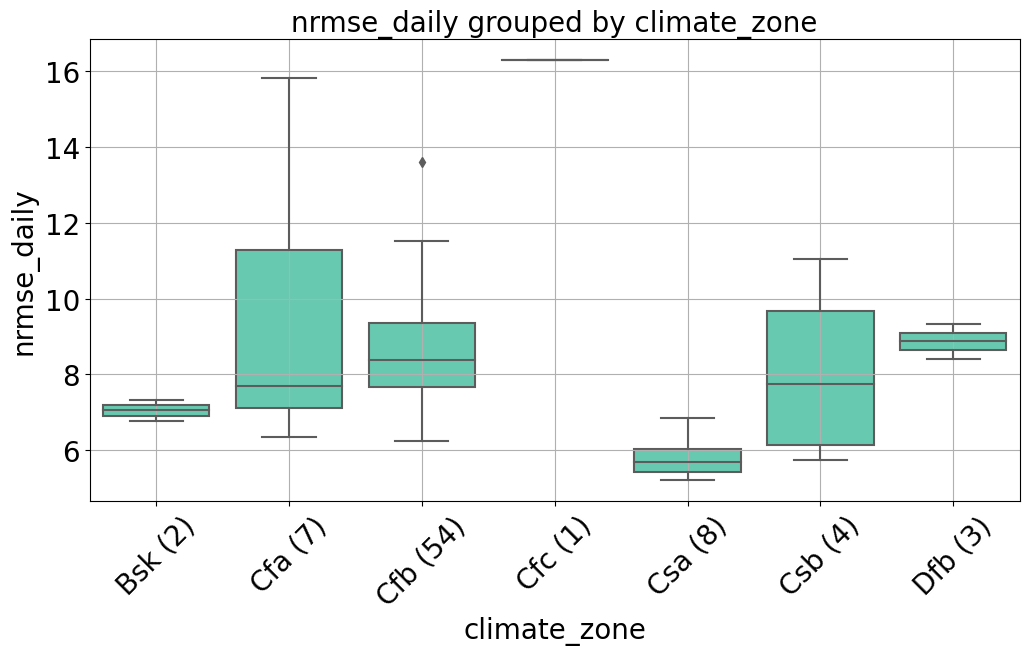

In [14]:
plotting.categorical_box(merged_df, 'climate_zone', 'nrmse_daily', plots_path,
                         x_order=['BSk', 'Cfa', 'Cfb', 'Cfc', 'Csa', 'Csb', 'Dfb'],
                         x_ticklabels=['Bsk (2)', 'Cfa (7)', 'Cfb (54)', 'Cfc (1)', 'Csa (8)', 'Csb (4)', 'Dfb (3)'])

### time

Skipping NaN climate_zone


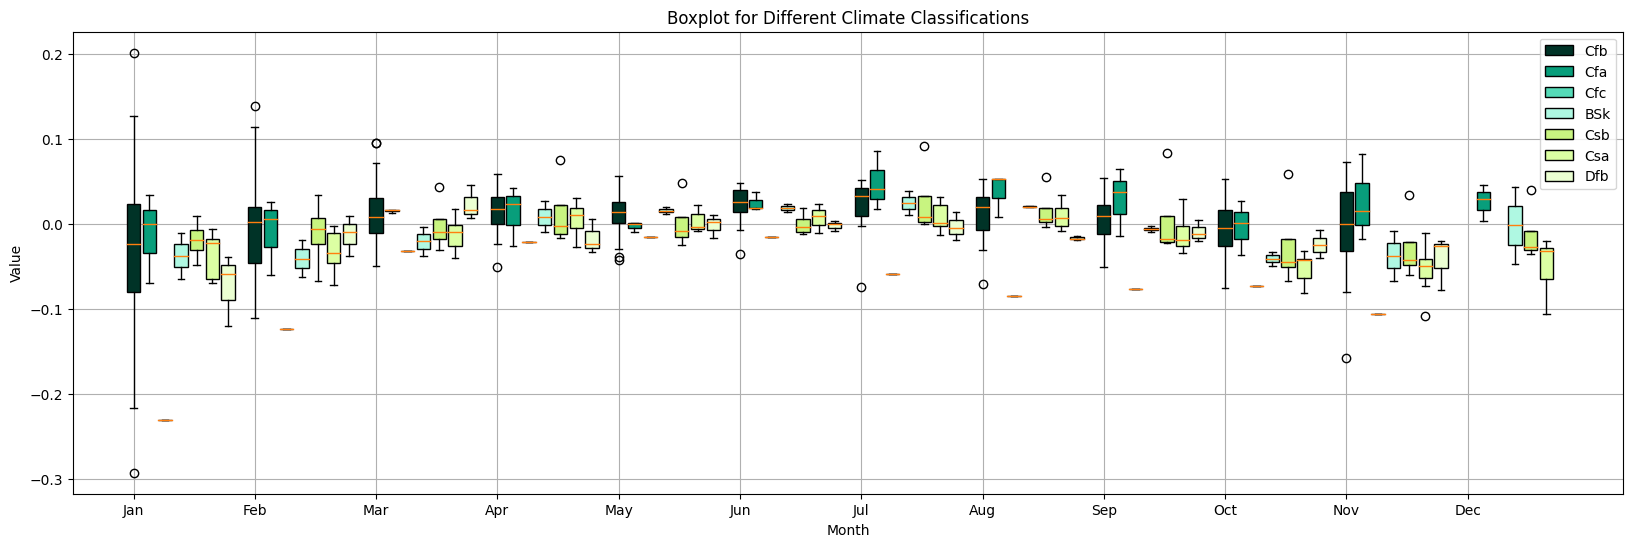

In [16]:
plotting.categorical_month_box(merged_df, 'climate_zone', validation, nmbe_mean_by_month)
